In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

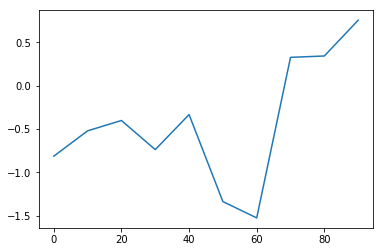

In [2]:
%matplotlib inline

# プロット関数について見ていく
# まずは適当にpd.Seriesをプロット
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

In [3]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), columns=['A', 'B', 'C', 'D'], index=np.arange(0, 100, 10))
df

,A,B,C,D
0,-0.259981,0.501205,1.084150,1.610813
10,-0.449796,0.063560,0.628582,0.704205
20,-0.421554,0.377303,1.975184,0.706955
30,-0.343501,0.216998,0.800017,0.189425
40,0.903132,2.481186,-0.454671,1.496810
50,0.795776,2.981795,-1.965228,2.484375
60,0.776008,3.786900,-2.371332,2.899129
70,0.515911,2.978860,-1.906743,2.002103
80,1.792644,5.429744,-1.061662,3.085330
90,1.811651,6.100396,-1.350869,2.873615


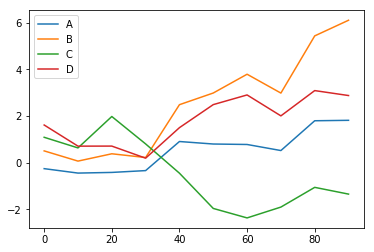

In [4]:
# pd.DataFrameをプロットするとこう
df.plot()

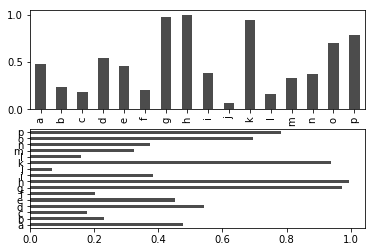

In [5]:
# ひとつのデータセットに対して複数のプロットを実行する
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
# plot関数にaxキーワードを指定してどのサブプロットかを指定すれば良い
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)

In [6]:
df = pd.DataFrame(np.random.rand(6, 4), index=['one', 'two', 'three', 'four', 'five', 'six'], columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.103983,0.183380,0.732661,0.403299
two,0.862922,0.968676,0.748198,0.769579
three,0.572788,0.470342,0.562066,0.015746
four,0.014029,0.985531,0.232728,0.036679
five,0.793235,0.938023,0.191003,0.559494
six,0.322819,0.405307,0.061666,0.824401


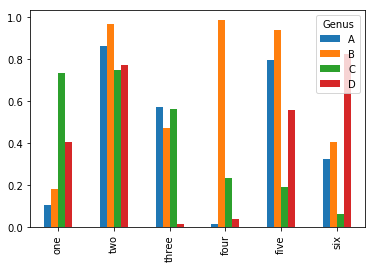

In [7]:
# 棒グラフをプロットするにはこう
df.plot(kind='bar')

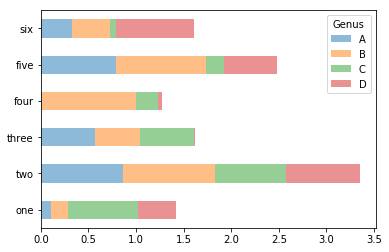

In [8]:
# 棒グラフのプロットにstackedキーワードを入れる
# 積み上げ棒グラフ
df.plot(kind='barh', stacked=True, alpha=0.5)

In [9]:
# クロス集計してみる
# クロス集計したいデータセットはこれ
tips = pd.read_csv('tips.csv')
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.4+ KB


In [10]:
# 日付と団体の人数でクロス集計
# crosstabメソッドでクロス集計できる
# tips.sizeにするとsizeカラムのSeriesオブジェクトを返すのではなくsizeメソッドが呼ばれるので、キーワードで呼んでいる
party_counts = pd.crosstab(tips.day, tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [11]:
# 1人と6人の団体は多くないのでドロップ
party_counts = party_counts.iloc[:, 1:5]
# 合計が1になるように正規化する
party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


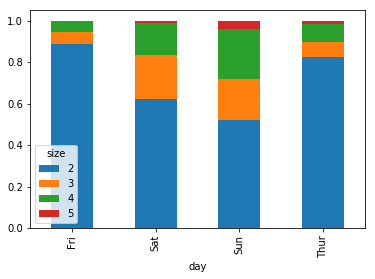

In [12]:
# 割合の積み上げ棒グラフをプロット
party_pcts.plot(kind='bar', stacked=True)

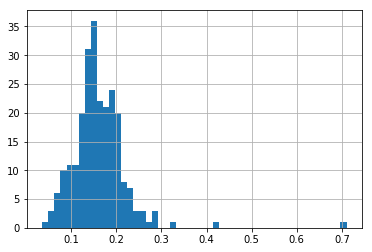

In [13]:
# 合計金額に対するチップの割合をヒストグラムする
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips['tip_pct'].hist(bins=50)

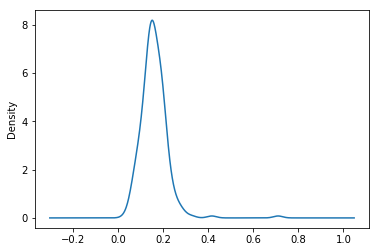

In [14]:
# ヒストグラムを確率密度関数に変換し、密度プロット
tips['tip_pct'].plot(kind='kde')

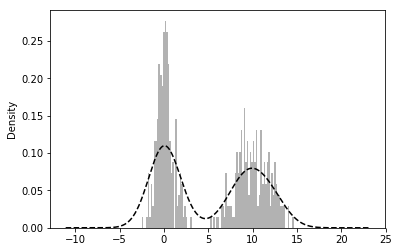

In [15]:
# N(平均, 分散)
comp1 = np.random.normal(0, 1, size=200) # N(0, 1)の標準正規分布
comp2 = np.random.normal(10, 2, size=200) # N(10, 2)の標準正規分布
values = pd.Series(np.concatenate([comp1, comp2]))
# ヒストグラムと密度プロットを同時に
values.hist(bins=100, alpha=0.3, color='k', normed=True)
values.plot(kind='kde', style='k--')

In [16]:
macro = pd.read_csv('macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
# 対数をとった上で微分する
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5,1,'Changes in log m1 vs. log unemp')

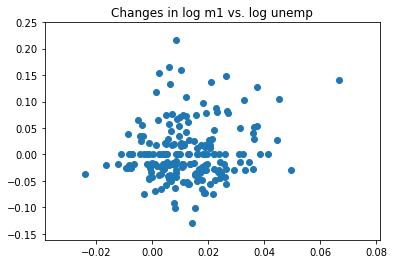

In [17]:
# m1とuempをペアプロットする
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d1f7c3e48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f5d1f57b550>]], dtype=object)

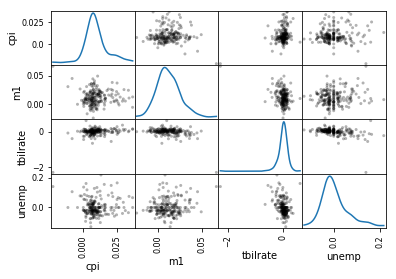

In [18]:
# すべての要素をペアプロットする
pd.plotting.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)